<a href="https://colab.research.google.com/github/EdisonWang00/Online-Delivery-Strategic-Analysis-/blob/main/Delivery_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_excel("/content/dd dataset.xlsx", engine='openpyxl')
df.dtypes

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,To_Store_time_take,DELIV_IS_20_MIN_LATE,TimeAccept_order,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60578,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 00:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,NaT,False,1,0,0,1,Cheryl's Snickerdoodle Cookie (1ct),1.99,Snacks,NaN,NaN
60579,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 00:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,NaT,False,1,0,0,1,DiGiorno Three Meat Rising Crust Pizza (29oz),9.99,Frozen,NaN,NaN
60580,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 00:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,NaT,False,1,0,0,1,Coke Soda Bottle (20 oz),2.59,Drinks,NaN,NaN
60581,b27da6db-b5a9-4307-aff8-678de71aa0a5,2022-09-15 00:00:46,DashMart1,2163056.0,Cincinnati,6,0,7.783333,NaT,False,1,0,0,1,Haagen-Dazs Ice Cream Bars Vanilla Milk Chocol...,6.49,Ice Cream,NaN,NaN


In [ ]:
df['To_Store_time_take'] = pd.to_numeric(df['To_Store_time_take'], errors='coerce')


In [ ]:
df.describe()

,DELIV_CREATED_AT,To_Store_time_take,DELIV_IS_20_MIN_LATE,TimeAccept_order,DELIV_CANCELLED_AT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE,Month,Day,Hour,Wait_Time_Before_Cancellation,Order_Canceled,Total_Price_Per_Delivery,Item_Count_Per_Delivery
count,60583,59295.000000,60583.000000,60301.000000,669,60583.0,60583.000000,60583.000000,60583.000000,60583.000000,60583.000000,60583.000000,60583.000000,669.000000,60583.000000,60583.000000,60583.000000
mean,2022-09-29 20:02:17.229569280,4.179022,0.047423,4.509985,2022-09-29 10:06:16.139013632,1.0,0.062493,0.042718,0.932390,4.969335,9.455540,15.627618,12.489477,30.633857,0.011043,35.779119,7.814156
min,2022-09-15 00:00:46,0.000000,0.000000,0.050000,2022-09-15 01:28:09,1.0,0.000000,0.000000,0.000000,0.290000,9.000000,1.000000,0.000000,0.283333,0.000000,0.300000,1.000000
25%,2022-09-22 18:01:23.500000,0.550000,0.000000,0.300000,2022-09-21 05:51:35,1.0,0.000000,0.000000,1.000000,2.590000,9.000000,8.000000,3.000000,1.783333,0.000000,16.450000,4.000000
50%,2022-09-29 19:33:35,2.716667,0.000000,1.666667,2022-09-29 02:26:59,1.0,0.000000,0.000000,1.000000,3.990000,9.000000,16.000000,15.000000,12.216667,0.000000,27.150000,6.000000
75%,2022-10-07 03:38:08,5.566667,0.000000,5.333333,2022-10-06 15:19:59,1.0,0.000000,0.000000,1.000000,5.990000,10.000000,24.000000,20.000000,33.000000,0.000000,44.020000,10.000000
max,2022-10-14 23:59:09,1313.500000,1.000000,119.783333,2022-10-15 00:06:26,1.0,1.000000,1.000000,1.000000,160.950000,10.000000,30.000000,23.000000,493.316667,1.000000,270.850000,44.000000
std,NaN,12.389261,0.212543,7.769097,NaN,0.0,0.242050,0.202223,0.251077,4.209347,0.498024,8.719809,8.545208,53.028801,0.104503,30.009896,6.161849


**Step 1: Data Preperation**
Select relevant Column
Identifying duplicated columns
Renaming Columns
Feature Creation



In [ ]:
# after reviewing the data I don't think I would need these two column
df = df.drop(columns=["DELIV_SUBMARKET", "ITEM_NAME"])

In [ ]:
# check on overall data quality
df.isna().sum()


,0
DELIVERY_UUID,0
DELIV_CREATED_AT,0
DELIV_STORE_NAME,0
DELIV_DASHER_ID,1009
To_Store_time_take,1287
DELIV_IS_20_MIN_LATE,0
TimeAccept_order,2393
DELIV_CANCELLED_AT,59914
DELIV_MISSING_INCORRECT_REPORT,0
WAS_REQUESTED,0


In [ ]:
#Working with missing data
# after reviewing the only data cleaning needed to be done is dash_id.
# we shouldn't imputate missing data for to store time take and time accept order given those are largely due to cancel order

missing_dasher_id_data = df[df['DELIV_DASHER_ID'].isnull()]

# Summarize the characteristics of these rows
missing_dasher_id_summary = {
    "Total Rows with Missing Dasher ID": missing_dasher_id_data.shape[0],
    "DELIV_CANCELLED_AT": missing_dasher_id_data['DELIV_CANCELLED_AT'].notnull().sum(),
    "To_Store_time_take": missing_dasher_id_data['To_Store_time_take'].isnull().sum(),
    "TimeAccept_order": missing_dasher_id_data['TimeAccept_order'].isnull().sum(),
    "DELIV_IS_20_MIN_LATE": missing_dasher_id_data['DELIV_IS_20_MIN_LATE'].value_counts().to_dict()
}

# Print the summary
print("Characteristics of Rows with Missing DELIV_DASHER_ID:")
for key, value in missing_dasher_id_summary.items():
    print(f"{key}: {value}")

# Possible reasons for missing DELIV_DASHER_ID
print("\nPossible Reasons for Missing DELIV_DASHER_ID:")
print("1. Cancelled Deliveries:")
print(f"   - {missing_dasher_id_summary['DELIV_CANCELLED_AT']} out of {missing_dasher_id_summary['Total Rows with Missing Dasher ID']} rows have a value in the DELIV_CANCELLED_AT column, indicating that these deliveries were cancelled.")
print("2. Incomplete Data Entry:")
print(f"   - All {missing_dasher_id_summary['Total Rows with Missing Dasher ID']} rows have missing values in the To_Store_time_take column.")
print(f"   - All {missing_dasher_id_summary['Total Rows with Missing Dasher ID']} rows have missing values in the TimeAccept_order column.")
print("3. System Errors:")
print("   - There could be system errors or issues in the data collection process that resulted in missing DELIV_DASHER_ID values.")


Characteristics of Rows with Missing DELIV_DASHER_ID:
Total Rows with Missing Dasher ID: 1009
DELIV_CANCELLED_AT: 669
To_Store_time_take: 1009
TimeAccept_order: 1009
DELIV_IS_20_MIN_LATE: {0: 936, 1: 73}

Possible Reasons for Missing DELIV_DASHER_ID:
1. Cancelled Deliveries:
   - 669 out of 1009 rows have a value in the DELIV_CANCELLED_AT column, indicating that these deliveries were cancelled.
2. Incomplete Data Entry:
   - All 1009 rows have missing values in the To_Store_time_take column.
   - All 1009 rows have missing values in the TimeAccept_order column.
3. System Errors:
   - There could be system errors or issues in the data collection process that resulted in missing DELIV_DASHER_ID values.


In [ ]:
# remove outlier
# Remove outliers by excluding the bottom 3 values for time to get to the store and time to accept order

uuid_max_time = df.groupby('DELIVERY_UUID')['To_Store_time_take'].max()
top_3_uuids = uuid_max_time.nlargest(3).index
df_filtered = df[~df['DELIVERY_UUID'].isin(top_3_uuids)]

uuid_max_accept_time = df.groupby('DELIVERY_UUID')['TimeAccept_order'].max()
top_3_accept_uuids = uuid_max_accept_time.nlargest(3).index
df_filtered = df[~df['DELIVERY_UUID'].isin(top_3_accept_uuids)]



In [ ]:
# clean up dasher id
df.loc[df['DELIV_DASHER_ID'].isnull() & df['DELIV_CANCELLED_AT'].notnull(), 'DELIV_DASHER_ID'] = 'Cancelled'

# Step 2: Impute "Unknown" for other rows with missing DELIV_DASHER_ID
df.loc[df['DELIV_DASHER_ID'].isnull(), 'DELIV_DASHER_ID'] = 'Unknown'

# Verify the imputation
missing_dasher_id_after_imputation = df['DELIV_DASHER_ID'].isnull().sum()
print(f"Missing DELIV_DASHER_ID after imputation: {missing_dasher_id_after_imputation}")

# Display the first few rows to verify the changes
print(df.head())

Missing DELIV_DASHER_ID after imputation: 0
                          DELIVERY_UUID    DELIV_CREATED_AT DELIV_STORE_NAME  \
0  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
1  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
2  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
3  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
4  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   

  DELIV_DASHER_ID To_Store_time_take  DELIV_IS_20_MIN_LATE  TimeAccept_order  \
0      16990594.0           0.083333                     0          0.366667   
1      16990594.0           0.083333                     0          0.366667   
2      16990594.0           0.083333                     0          0.366667   
3      16990594.0           0.083333                     0          0.366667   
4      16990594.0           0.083333                     0          0.36666

/tmp/ipython-input-3539558537.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cancelled' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['DELIV_DASHER_ID'].isnull() & df['DELIV_CANCELLED_AT'].notnull(), 'DELIV_DASHER_ID'] = 'Cancelled'


In [ ]:
# missing value for time to store
# Replace missing values with the mean for rows where DELIV_IS_20_MIN_LATE is 0.
# Leave the missing values as they are for rows where DELIV_IS_20_MIN_LATE is 1.
missing_time_accept_order_data = df[df['TimeAccept_order'].isnull()]

# Calculate the mean TimeAccept_order for rows that are not late
mean_time_accept_order = df[df['DELIV_IS_20_MIN_LATE'] == 0]['TimeAccept_order'].mean()

# Step 1: Replace missing TimeAccept_order with the mean for rows where DELIV_IS_20_MIN_LATE is 0
df.loc[missing_time_accept_order_data.index[df.loc[missing_time_accept_order_data.index, 'DELIV_IS_20_MIN_LATE'] == 0], 'TimeAccept_order'] = mean_time_accept_order

# Step 2: Leave the missing values as they are for rows where DELIV_IS_20_MIN_LATE is 1
# No action needed for this step as we are leaving them blank

# Verify the imputation
missing_time_accept_order_after_imputation = df['TimeAccept_order'].isnull().sum()
print(f"Missing TimeAccept_order after imputation: {missing_time_accept_order_after_imputation}")

# Display the first few rows to verify the changes
print(df.head())

Missing TimeAccept_order after imputation: 282
                          DELIVERY_UUID    DELIV_CREATED_AT DELIV_STORE_NAME  \
0  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
1  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
2  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
3  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   
4  9140e853-ea67-4eee-ba76-85fafcc7da6d 2022-10-14 23:59:09         Grocery1   

  DELIV_DASHER_ID To_Store_time_take  DELIV_IS_20_MIN_LATE  TimeAccept_order  \
0      16990594.0           0.083333                     0          0.366667   
1      16990594.0           0.083333                     0          0.366667   
2      16990594.0           0.083333                     0          0.366667   
3      16990594.0           0.083333                     0          0.366667   
4      16990594.0           0.083333                     0          0.36

In [ ]:
df.loc[df.duplicated()]
#No immediate action taken on duplicate rows, as they may reflect customers intentionally purchasing the same item multiple times within a single order.
#Further business context is required to validate this assumption. For now, the data will be left unchanged.

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,To_Store_time_take,DELIV_IS_20_MIN_LATE,TimeAccept_order,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
26,ad617ed7-1907-4c4c-8d06-9671724c1c20,2022-10-14 23:57:15,Grocery1,606237.0,6.75,0,0.450000,NaT,False,1,0,0,1,0.40,Pantry,NaN,NaN
33,ad617ed7-1907-4c4c-8d06-9671724c1c20,2022-10-14 23:57:15,Grocery1,606237.0,6.75,0,0.450000,NaT,False,1,0,0,1,0.40,Pantry,NaN,NaN
42,ad617ed7-1907-4c4c-8d06-9671724c1c20,2022-10-14 23:57:15,Grocery1,606237.0,6.75,0,0.450000,NaT,False,1,0,0,1,0.40,Pantry,NaN,NaN
52,ad617ed7-1907-4c4c-8d06-9671724c1c20,2022-10-14 23:57:15,Grocery1,606237.0,6.75,0,0.450000,NaT,False,1,0,0,1,0.40,Pantry,NaN,NaN
57,045e4d8f-de15-47b6-b84b-55ca55fd9dcf,2022-10-14 23:55:33,DashMart1,15300800.0,3.4,0,0.166667,NaT,False,1,0,0,1,6.29,Ice Cream,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60496,4e71e3b8-f253-4539-8d6d-c25fc930ff22,2022-09-15 00:27:55,DashMart1,6092846.0,6.133333,0,6.666667,NaT,False,1,0,0,1,1.49,Pantry,NaN,NaN
60514,f57cb7e2-0f8c-401a-93de-ebd2450d3d4c,2022-09-15 00:16:54,DashMart1,1851065.0,0.116667,0,7.050000,NaT,False,1,0,0,1,3.99,Pantry,NaN,NaN
60522,e0e75c44-05e7-458b-9763-d8e08c829de7,2022-09-15 00:13:12,Grocery1,19268777.0,2.7,1,45.083333,NaT,False,1,0,0,1,4.95,Snacks,NaN,NaN
60525,96aea971-09d8-47e1-85ae-ca7005e070f8,2022-09-15 00:11:45,Grocery3,15280057.0,7.4,0,0.100000,NaT,False,1,0,0,1,5.05,Snacks,NaN,NaN


# Step 2  Feature Engineering and Statistics Analysis
For stats analysis, I mainly want to look at the correlation of variables and the basic distribution of the data

For feature engineering I am focusing on three  main tasks:

1. Extracting the month, day, and hour from the delivery creation timestamp.

2. Creating a new column for the wait time before cancellation, along with a column indicating whether the order was canceled.
3. Total price per order and total item per order

In [ ]:
df.describe()

In [ ]:
# Convert DELIV_CREATED_AT and DELIV_CANCELLED_AT to datetime if they are not already
df['DELIV_CREATED_AT'] = pd.to_datetime(df['DELIV_CREATED_AT'], format='%Y-%m-%d %H:%M:%S')
df['DELIV_CANCELLED_AT'] = pd.to_datetime(df['DELIV_CANCELLED_AT'], format='%Y-%m-%d %H:%M:%S')

# Extract month, day, and hour from the delivery creation timestamp
df['Month'] = df['DELIV_CREATED_AT'].dt.month
df['Day'] = df['DELIV_CREATED_AT'].dt.day
df['Hour'] = df['DELIV_CREATED_AT'].dt.hour

# Create a new column for the wait time before cancellation
df['Wait_Time_Before_Cancellation'] = (df['DELIV_CANCELLED_AT'] - df['DELIV_CREATED_AT']).dt.total_seconds() / 60.0

# Create a new column indicating whether the order was canceled
df['Order_Canceled'] = df['DELIV_CANCELLED_AT'].notnull().astype(int)

# Generate the 'Total_Price_Per_Delivery' and 'Item_Count_Per_Delivery' columns
df['Total_Price_Per_Delivery'] = df.groupby('DELIVERY_UUID')['ITEM_PRICE'].transform('sum')
df['Item_Count_Per_Delivery'] = df.groupby('DELIVERY_UUID')['DELIVERY_UUID'].transform('count')

df.head()

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,To_Store_time_take,DELIV_IS_20_MIN_LATE,TimeAccept_order,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,...,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY,Month,Day,Hour,Wait_Time_Before_Cancellation,Order_Canceled,Total_Price_Per_Delivery,Item_Count_Per_Delivery
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,0.083333,0,0.366667,NaT,False,1,...,Alcohol,NaN,NaN,10,14,23,NaN,0,31.84,8
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,0.083333,0,0.366667,NaT,False,1,...,Pantry,NaN,NaN,10,14,23,NaN,0,31.84,8
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,0.083333,0,0.366667,NaT,False,1,...,Bakery,NaN,NaN,10,14,23,NaN,0,31.84,8
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,0.083333,0,0.366667,NaT,False,1,...,Dairy & Eggs,NaN,NaN,10,14,23,NaN,0,31.84,8
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,0.083333,0,0.366667,NaT,False,1,...,Pantry,NaN,NaN,10,14,23,NaN,0,31.84,8


In [ ]:
# 1. Extracting the month, day, and hour from the delivery creation timestamp.

# Display the first few rows to verify the changes
df[['DELIV_CREATED_AT', 'Month', 'Day', 'Hour']].head()

,DELIV_CREATED_AT,Month,Day,Hour
0,2022-10-14 23:59:09,10,14,23
1,2022-10-14 23:59:09,10,14,23
2,2022-10-14 23:59:09,10,14,23
3,2022-10-14 23:59:09,10,14,23
4,2022-10-14 23:59:09,10,14,23


In [ ]:
#  2. Creating a new column for the wait time before cancellation, along with a column indicating whether the order was canceled.


# Display result
print(df[['DELIV_CREATED_AT', 'DELIV_CANCELLED_AT', 'Wait_Time_Before_Cancellation']].head())

     DELIV_CREATED_AT DELIV_CANCELLED_AT  Wait_Time_Before_Cancellation
0 2022-10-14 23:59:09                NaT                            NaN
1 2022-10-14 23:59:09                NaT                            NaN
2 2022-10-14 23:59:09                NaT                            NaN
3 2022-10-14 23:59:09                NaT                            NaN
4 2022-10-14 23:59:09                NaT                            NaN


## `**Analysis Section one : Why Orders are Late or canceled ✉ **`
To diagnose the first part , I structured the problem into five core dimensions:

*  Item-level attributes and Store -specific characteristics,
*   Dasher performance,
*   Operational processe
*   Time of day

 A deep-dive analysis across each area enabled us to isolate key drivers of service performance

 # Item And Store Analysis

1. Item Level
- Does the total price of an order affect delivery lateness?
- Does the number of items in an order influence lateness?
- Which Categories has longer Acceptance time & higher late percentage & Cancel rate
2. Store level
- top selling item by store
- total order by store
- which store tend to more late or takes longer for driver to go

In [ ]:
# Calculate the average total price for late and on-time deliveries
avg_total_price_late = df[df['DELIV_IS_20_MIN_LATE'] == 1]['Total_Price_Per_Delivery'].mean()
avg_total_price_on_time = df[df['DELIV_IS_20_MIN_LATE'] == 0]['Total_Price_Per_Delivery'].mean()

print(f"Average Total Price for Late Deliveries: ${avg_total_price_late:.2f}")
print(f"Average Total Price for On-Time Deliveries: ${avg_total_price_on_time:.2f}")

Average Total Price for Late Deliveries: $39.72
Average Total Price for On-Time Deliveries: $35.58


In [ ]:
# Calculate the correlation between total price and lateness
correlation_total_price_lateness = df['Total_Price_Per_Delivery'].corr(df['DELIV_IS_20_MIN_LATE'])

print(f"Correlation between Total Price and Lateness: {correlation_total_price_lateness:.2f}")

Correlation between Total Price and Lateness: 0.03


In [ ]:
# Which Categories has longer Acceptance time & higher late percentage & Cancel rate
# Calculate the average time to accept orders, total deliveries, and percentage of canceled orders for each item category
# Create a flag for canceled orders
df['Order_Canceled'] = df['DELIV_CANCELLED_AT'].notnull().astype(int)

# Create a flag for late deliveries (assuming 1 means late)
df['Order_Late'] = df['DELIV_IS_20_MIN_LATE'] == 1

# Group and aggregate by item category
category_analysis = df.groupby('ITEM_CATEGORY').agg(
    avg_time_accept_order=('TimeAccept_order', 'mean'),
    total_deliveries=('DELIVERY_UUID', 'count'),
    total_canceled=('Order_Canceled', 'sum'),
    total_late=('Order_Late', 'sum')  # New: count of late deliveries
)

category_analysis['percentage_canceled'] = (category_analysis['total_canceled'] / category_analysis['total_deliveries']) * 100
category_analysis['percentage_late'] = (category_analysis['total_late'] / category_analysis['total_deliveries']) * 100  # New

category_analysis = category_analysis.sort_values(by='avg_time_accept_order', ascending=False)

print("Analysis of Average Time to Accept Orders by Item Category")
print(category_analysis)

print("\nCategories with Longer Acceptance Times:")
print(category_analysis.head(5))

print("\nCategories with Shorter Acceptance Times:")
print(category_analysis.tail(5))

print("\nPercentage of Canceled Orders by Item Category:")
print(category_analysis[['total_deliveries', 'total_canceled', 'percentage_canceled']])

print("\nPercentage of Late Deliveries by Item Category:")
print(category_analysis[['total_deliveries', 'total_late', 'percentage_late']])


Analysis of Average Time to Accept Orders by Item Category
                    avg_time_accept_order  total_deliveries  total_canceled  \
ITEM_CATEGORY                                                                 
Alcohol                          6.471746              1523              29   
Electronics                      5.637530                63               1   
Baby                             5.623127               152               5   
Household                        5.476273              2392              37   
Personal Care                    5.222279              1289              15   
Flowers                          5.179905                37               4   
Health                           4.886274               330               6   
Produce                          4.828561              3926              23   
Candy                            4.530634              4970              57   
Snacks                           4.495750              9525             

In [ ]:
total_revenue_by_item = df.groupby('ITEM_CATEGORY')['ITEM_PRICE'].sum().sort_values(ascending=False)

highest_revenue_item = total_revenue_by_item.idxmax()
highest_revenue_value = total_revenue_by_item.max()

print("Item with the Highest Total Revenue:")
print(f"Item: {highest_revenue_item}")
print(f"Total Revenue: ${highest_revenue_value:.2f}")

# Display the top 5 items by total revenue
print("\nTop 5 Items by Total Revenue:")
print(total_revenue_by_item.head(5))

Item with the Highest Total Revenue:
Item: Drinks
Total Revenue: $50832.13

Top 5 Items by Total Revenue:
ITEM_CATEGORY
Drinks     50832.13
Snacks     38938.07
Pantry     26419.58
Alcohol    21070.44
Frozen     20558.27
Name: ITEM_PRICE, dtype: float64


/tmp/ipython-input-3455826286.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


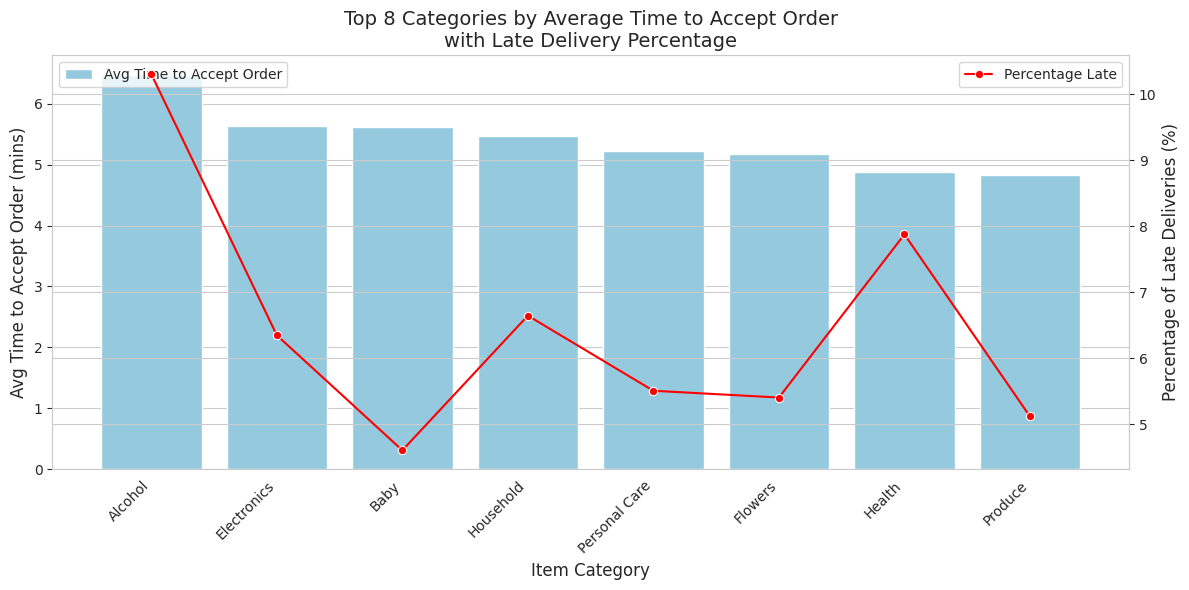

In [ ]:
top8_categories = category_analysis.sort_values(by='avg_time_accept_order', ascending=False).head(8)

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Bar plot for avg time to accept order
ax = sns.barplot(
    x=top8_categories.index,
    y='avg_time_accept_order',
    data=top8_categories,
    color='skyblue',
    label='Avg Time to Accept Order'
)

# Twin axis for percentage of late deliveries
ax2 = ax.twinx()
sns.lineplot(
    x=top8_categories.index,
    y='percentage_late',
    data=top8_categories,
    color='red',
    marker='o',
    label='Percentage Late',
    ax=ax2
)

# Axis labels and title
ax.set_ylabel('Avg Time to Accept Order (mins)', fontsize=12)
ax2.set_ylabel('Percentage of Late Deliveries (%)', fontsize=12)
ax.set_xlabel('Item Category', fontsize=12)
plt.title('Top 8 Categories by Average Time to Accept Order\nwith Late Delivery Percentage', fontsize=14)

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation between total price and lateness
correlation_total_price_lateness = df['Total_Price_Per_Delivery'].corr(df['DELIV_IS_20_MIN_LATE'])

# Calculate the correlation between item count and lateness
correlation_item_count_lateness = df['Item_Count_Per_Delivery'].corr(df['DELIV_IS_20_MIN_LATE'])

print(f"Correlation between Total Price and Lateness: {correlation_total_price_lateness:.2f}")
print(f"Correlation between Item Count and Lateness: {correlation_item_count_lateness:.2f}")

Correlation between Total Price and Lateness: 0.03
Correlation between Item Count and Lateness: 0.02


In [ ]:
top_items_by_store = df.groupby(['DELIV_STORE_NAME', 'ITEM_CATEGORY']).size().reset_index(name='item_count')

# Sort to get the top-selling items per store
top_items_by_store = top_items_by_store.sort_values(['DELIV_STORE_NAME', 'item_count'], ascending=[True, False])

# Get top 3 items per store
top_items_per_store = top_items_by_store.groupby('DELIV_STORE_NAME').head(3)

print("Top-selling items by store:")
print(top_items_per_store)

Top-selling items by store:
   DELIV_STORE_NAME ITEM_CATEGORY  item_count
5         DashMart1        Drinks        8493
18        DashMart1        Snacks        6932
3         DashMart1         Candy        4370
35         Grocery1        Pantry        3466
38         Grocery1       Produce        2285
24         Grocery1  Dairy & Eggs        2083
58         Grocery2        Pantry        1328
48         Grocery2        Drinks         909
47         Grocery2  Dairy & Eggs         867
71         Grocery3        Frozen         127
75         Grocery3        Pantry         127
69         Grocery3        Drinks         126


In [ ]:
# Drop duplicate orders
total_orders_by_store = df[['DELIV_STORE_NAME', 'DELIVERY_UUID']].drop_duplicates()

# Count orders per store
total_orders_count = total_orders_by_store.groupby('DELIV_STORE_NAME').size().reset_index(name='total_orders')

print("Total number of orders by store:")
print(total_orders_count)

Total number of orders by store:
  DELIV_STORE_NAME  total_orders
0        DashMart1          9018
1         Grocery1          2736
2         Grocery2          1143
3         Grocery3           188


In [ ]:
# Create flags if not already
df['Order_Late'] = df['DELIV_IS_20_MIN_LATE'] == 1
df['Item_Missing'] = df['WAS_MISSING'] == 1

# Group by store and calculate all metrics
store_performance = df.groupby('DELIV_STORE_NAME').agg(
    avg_time_to_store=('To_Store_time_take', 'mean'),
    total_orders=('DELIVERY_UUID', 'nunique'),
    total_late_orders=('Order_Late', 'sum'),
    total_items=('ITEM_CATEGORY', 'count'),           # Use ITEM_CATEGORY here
    total_missing_items=('Item_Missing', 'sum')
)

# Calculate percentages
store_performance['percentage_late'] = (store_performance['total_late_orders'] / store_performance['total_orders']) * 100
store_performance['percentage_missing'] = (store_performance['total_missing_items'] / store_performance['total_items']) * 100

# Sort by lateness or time to store
store_performance_sorted = store_performance.sort_values(
    by=['percentage_late', 'avg_time_to_store'], ascending=False
)

# Display the updated table
print("📊 Stores with higher lateness, longer travel times, and missing item rates:\n")
print(store_performance_sorted[['avg_time_to_store', 'total_orders', 'total_late_orders',
                                'percentage_late', 'total_items', 'total_missing_items',
                                'percentage_missing']].round(2))

📊 Stores with higher lateness, longer travel times, and missing item rates:

                  avg_time_to_store  total_orders  total_late_orders  \
DELIV_STORE_NAME                                                       
Grocery2                       8.13          1143                409   
Grocery1                       4.79          2736                621   
DashMart1                      2.91          9018               1837   
Grocery3                       7.37           188                  6   

                  percentage_late  total_items  total_missing_items  \
DELIV_STORE_NAME                                                      
Grocery2                    35.78         7534                  962   
Grocery1                    22.70        17726                 2620   
DashMart1                   20.37        34349                   78   
Grocery3                     3.19          974                  126   

                  percentage_missing  
DELIV_STORE_NAME        

In [ ]:
# Round the values for better display
store_performance_display = store_performance_sorted.copy()
store_performance_display['avg_time_to_store'] = store_performance_display['avg_time_to_store'].round(2)
store_performance_display['percentage_late'] = store_performance_display['percentage_late'].round(2)

# Reset index to make DELIV_STORE_NAME a column
store_performance_display = store_performance_display.reset_index()

# Display as table
print("Stores with Higher Lateness or Longer Driver Travel Times:\n")
print(store_performance_display.to_string(index=False))

Stores with Higher Lateness or Longer Driver Travel Times:

DELIV_STORE_NAME  avg_time_to_store  total_orders  total_late_orders  percentage_late
        Grocery2               8.13          1143                409            35.78
        Grocery1               4.79          2736                621            22.70
       DashMart1               2.91          9018               1837            20.37
        Grocery3               7.37           188                  6             3.19


In [ ]:
# Aggregate by order: find if any item missing and if order was late
order_summary = df.groupby('DELIVERY_UUID').agg({
    'WAS_MISSING': 'max',  # 1 if any missing in order
    'WAS_SUBBED': 'max',   # 1 if any subbed in order
    'DELIV_IS_20_MIN_LATE': 'max'  # 1 if order was late
}).reset_index()

order_corr = order_summary[['WAS_MISSING', 'WAS_SUBBED', 'DELIV_IS_20_MIN_LATE']].corr()

print("Correlation matrix (order level):")
print(order_corr)

Correlation matrix (order level):
                      WAS_MISSING  WAS_SUBBED  DELIV_IS_20_MIN_LATE
WAS_MISSING              1.000000    0.853943             -0.012375
WAS_SUBBED               0.853943    1.000000             -0.015946
DELIV_IS_20_MIN_LATE    -0.012375   -0.015946              1.000000


In [ ]:
alcohol_sales = df[df['ITEM_CATEGORY'].str.lower() == 'alcohol']

# Group by store and count alcohol items
alcohol_by_store = alcohol_sales.groupby('DELIV_STORE_NAME').size().reset_index(name='alcohol_item_count')

# Sort descending to find the top-selling store
alcohol_by_store_sorted = alcohol_by_store.sort_values(by='alcohol_item_count', ascending=False)

# Show top result
top_alcohol_store = alcohol_by_store_sorted.head(1)

print("Store with the highest alcohol sales:")
print(top_alcohol_store)

Store with the highest alcohol sales:
  DELIV_STORE_NAME  alcohol_item_count
0        DashMart1                1206


# Dasher Analysis
1. Investigating whether longer order acceptance times by Dashers are linked to increased delivery lateness.
2. Exploring potential reasons for delayed acceptance, including:
- New or inexperienced Dashers.
- Dashers who are generally slower or less responsive.



- Considering whether Dasher performance tiers (e.g., based on number of orders completed per day) influence:

  - Time taken to accept orders.
  - Overall delivery punctuality.
  - get canceled

3. Can Dasher go to more than one location per order

In [ ]:
correlation = df['TimeAccept_order'].corr(df['DELIV_IS_20_MIN_LATE'])

print(f"Correlation between TimeAccept_order and DELIV_IS_20_MIN_LATE: {correlation:.2f}")

Correlation between TimeAccept_order and DELIV_IS_20_MIN_LATE: 0.42


In [ ]:
delivery_grouped = df.groupby('DELIVERY_UUID').agg(
    DELIV_DASHER_ID=('DELIV_DASHER_ID', 'first'),
    DELIV_IS_20_MIN_LATE=('DELIV_IS_20_MIN_LATE', 'max'),
    TimeAccept_order=('TimeAccept_order', 'mean')
)


deliveries_per_driver = delivery_grouped['DELIV_DASHER_ID'].value_counts()

def categorize_tier(deliveries):
    if deliveries <= 10:
        return 'Low'
    elif deliveries <= 30:
        return 'Medium'
    else:
        return 'High'

driver_tiers = deliveries_per_driver.apply(categorize_tier)

delivery_grouped['Driver_Tier'] = delivery_grouped['DELIV_DASHER_ID'].map(driver_tiers)

# Calculate the percentage of lateness and average time to accept orders for each tier
tier_analysis = delivery_grouped.groupby('Driver_Tier').agg(
    total_deliveries=('DELIV_DASHER_ID', 'count'),
    late_deliveries=('DELIV_IS_20_MIN_LATE', 'sum'),
    avg_time_accept_order=('TimeAccept_order', 'mean')
)

tier_analysis['late_percentage'] = (tier_analysis['late_deliveries'] / tier_analysis['total_deliveries']) * 100

# Display the results
print("Driver Categorization and Lateness Analysis")
print(tier_analysis)




# Time level Analysis
- Analyze whether the time of day or day of the week has any impact on order lateness.

- Identify the top 2 best-selling items for each hour of the day.

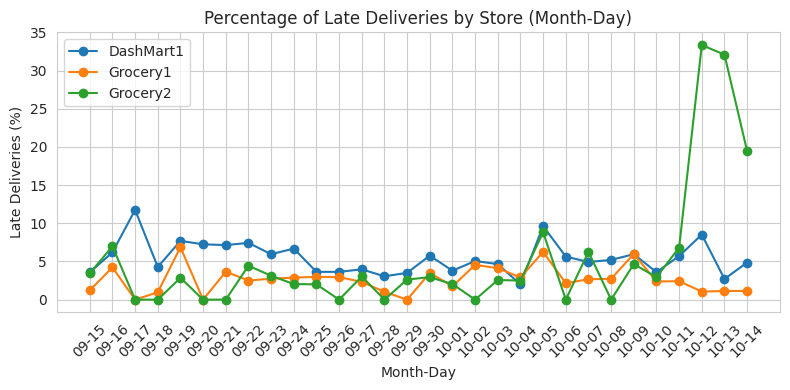

In [ ]:

import matplotlib.pyplot as plt

# Step 1: Deduplicate to delivery-level
delivery_level = df.groupby('DELIVERY_UUID').agg({
    'DELIV_STORE_NAME': 'first',
    'DELIV_IS_20_MIN_LATE': 'max',  # Order is late if any item is late
    'Month': 'first',
    'Day': 'first'
}).reset_index()

# Step 2: Combine month and day as 'MM-DD'
delivery_level['month_day'] = (
    delivery_level['Month'].astype(str).str.zfill(2) + '-' +
    delivery_level['Day'].astype(str).str.zfill(2)
)

# Step 3: Group by store and MM-DD to calculate late %
store_late_by_day = delivery_level.groupby(['DELIV_STORE_NAME', 'month_day']).agg(
    total_orders=('DELIVERY_UUID', 'count'),
    late_orders=('DELIV_IS_20_MIN_LATE', 'sum')
).reset_index()

store_late_by_day['percent_late'] = (
    store_late_by_day['late_orders'] / store_late_by_day['total_orders'] * 100
)

# Step 4: Plot for top 3 stores
top_stores = delivery_level['DELIV_STORE_NAME'].value_counts().nlargest(3).index

plt.figure(figsize=(8, 4))
for store in top_stores:
    store_data = store_late_by_day[store_late_by_day['DELIV_STORE_NAME'] == store]
    plt.plot(store_data['month_day'], store_data['percent_late'], marker='o', label=store)

plt.title('Percentage of Late Deliveries by Store (Month-Day)')
plt.xlabel('Month-Day')
plt.ylabel('Late Deliveries (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()